<a href="https://colab.research.google.com/github/Julian27R/Trabajos/blob/main/Circuito_RLC_PARALELO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***EJERCICIO***

 Encuentre la función de transferencia (demostración matemática) para un circuito RLC paralelo (entrada: fuente de corriente AC, salida: corriente en inductor), con condiciones iniciales cero. Luego, utilizando la API de control de sympy, simular y graficar:
1. Diagrama de polos y ceros.
2. Elemento de lista
3. Diagrama de bode.
4. Respuesta impulso.
5. Respuesta escalón.  
6. Respuesta rampa.









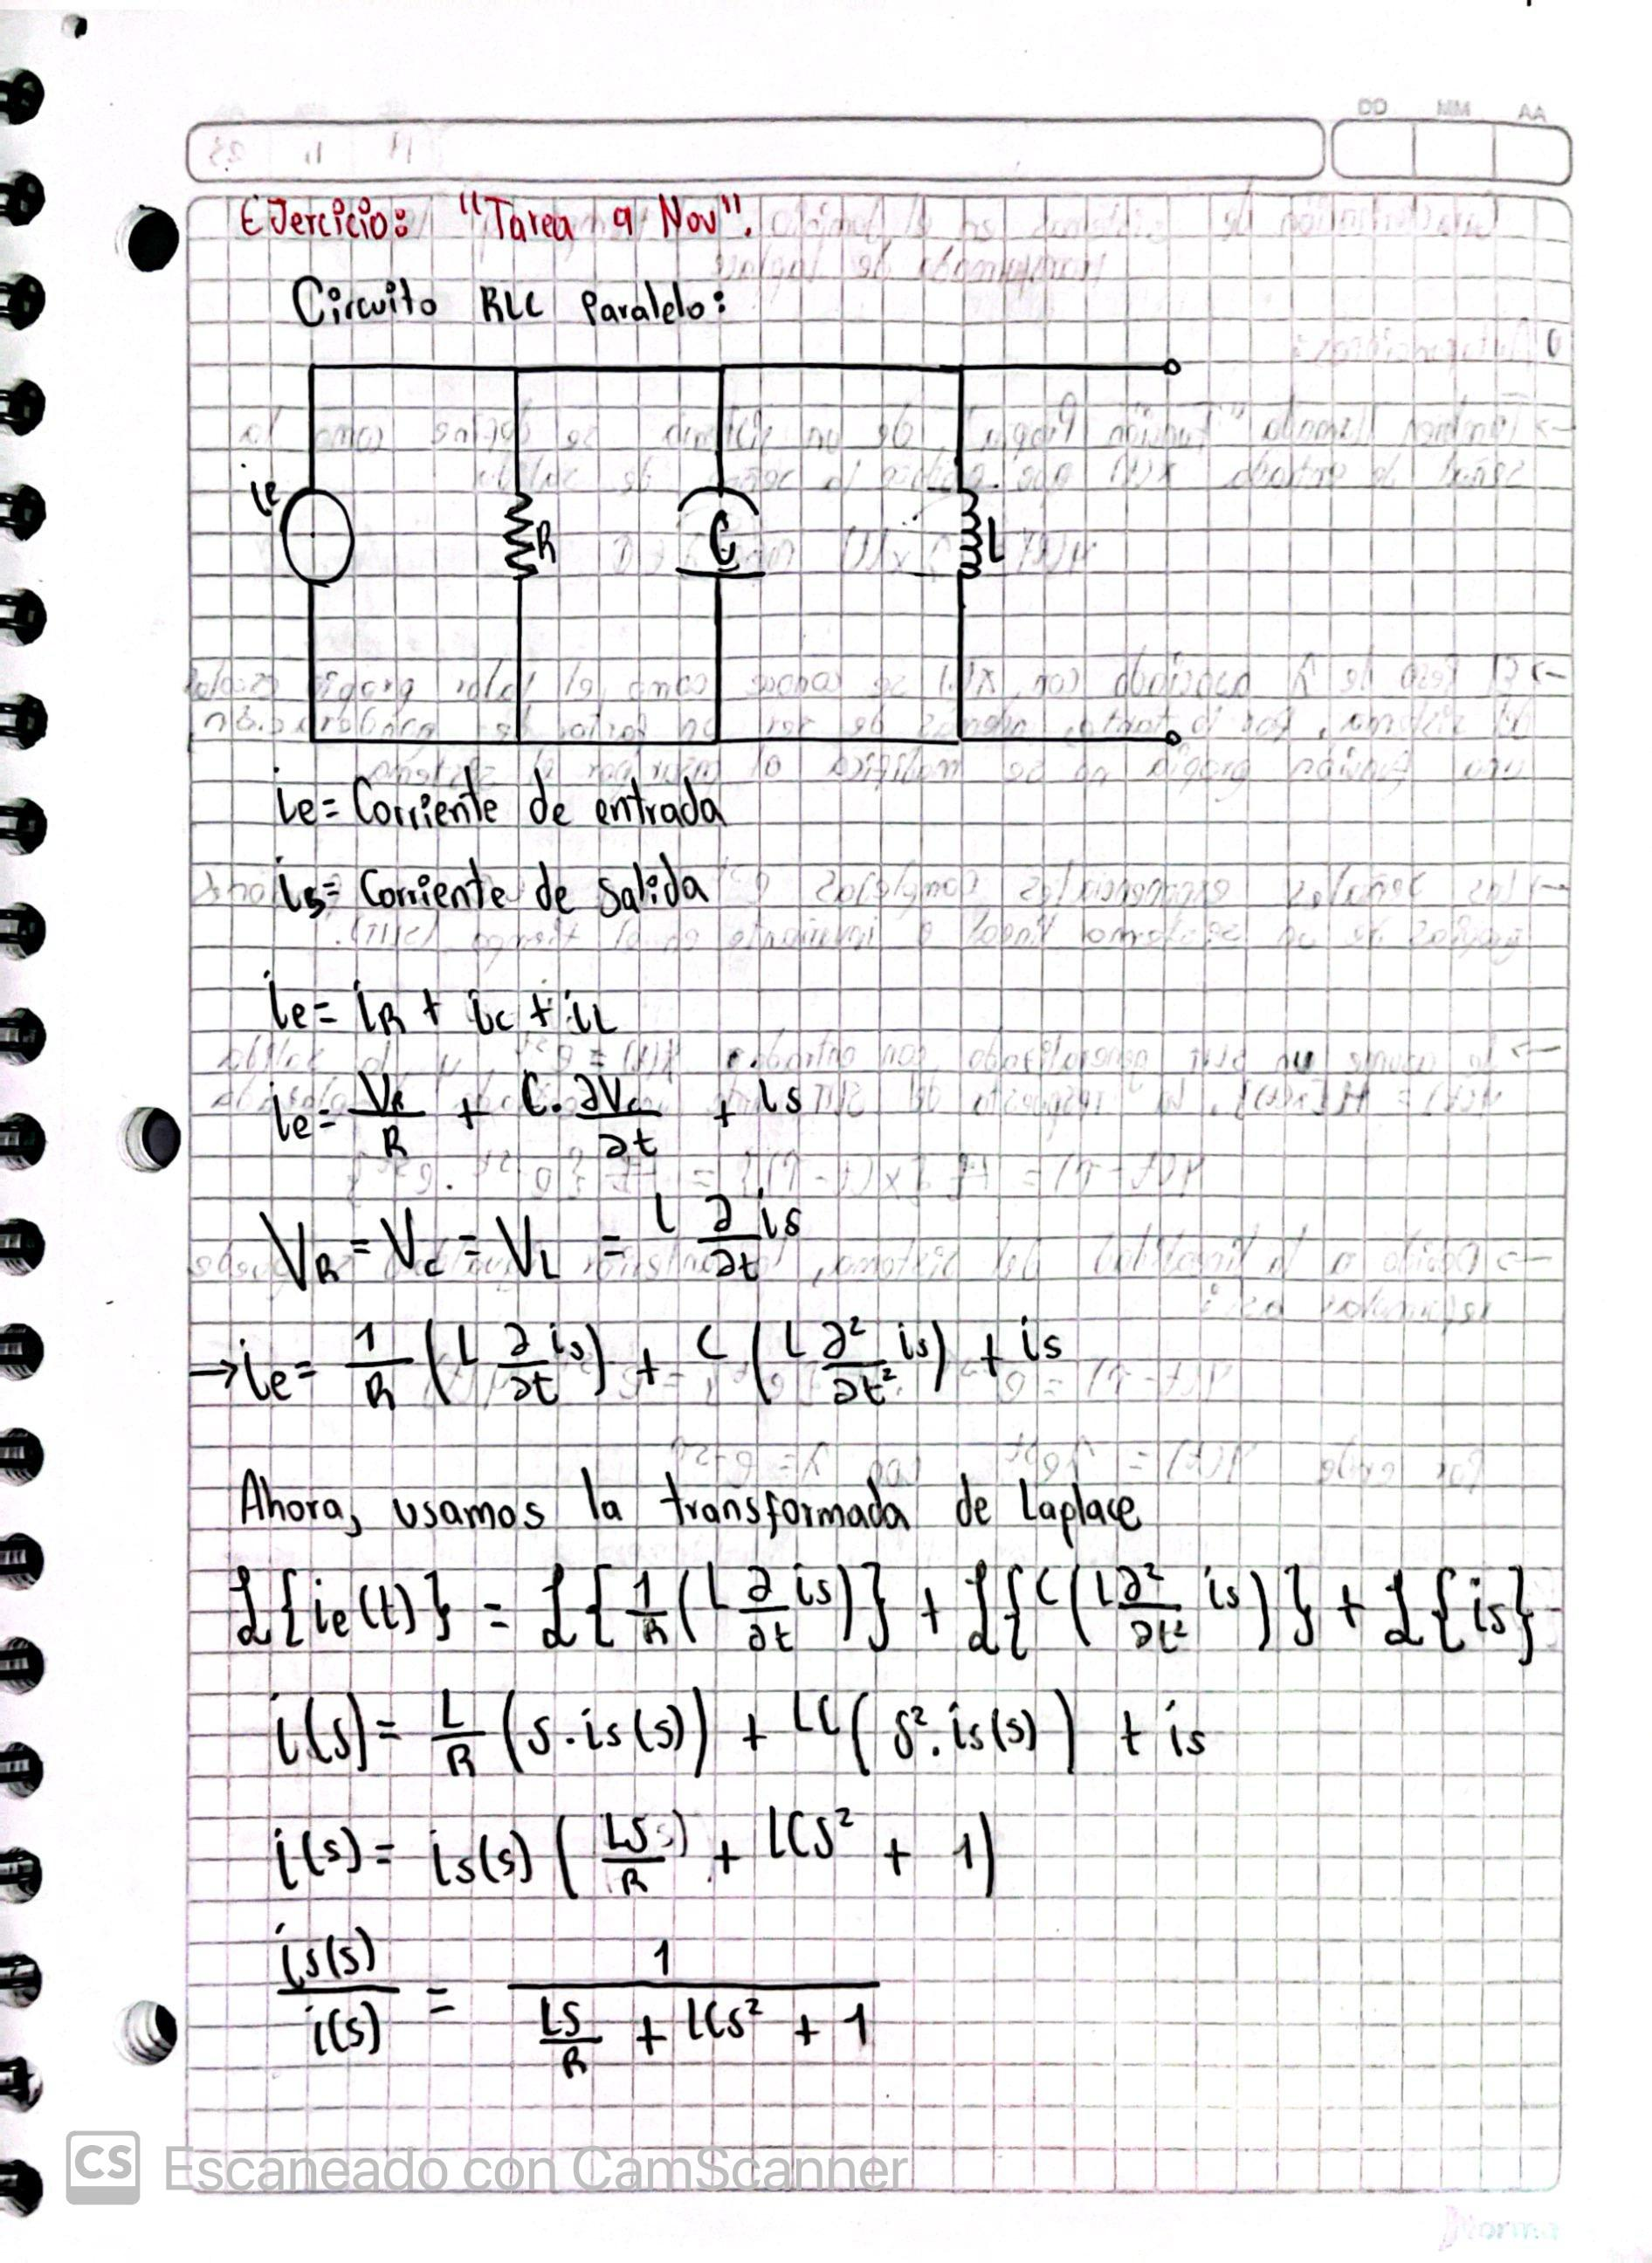

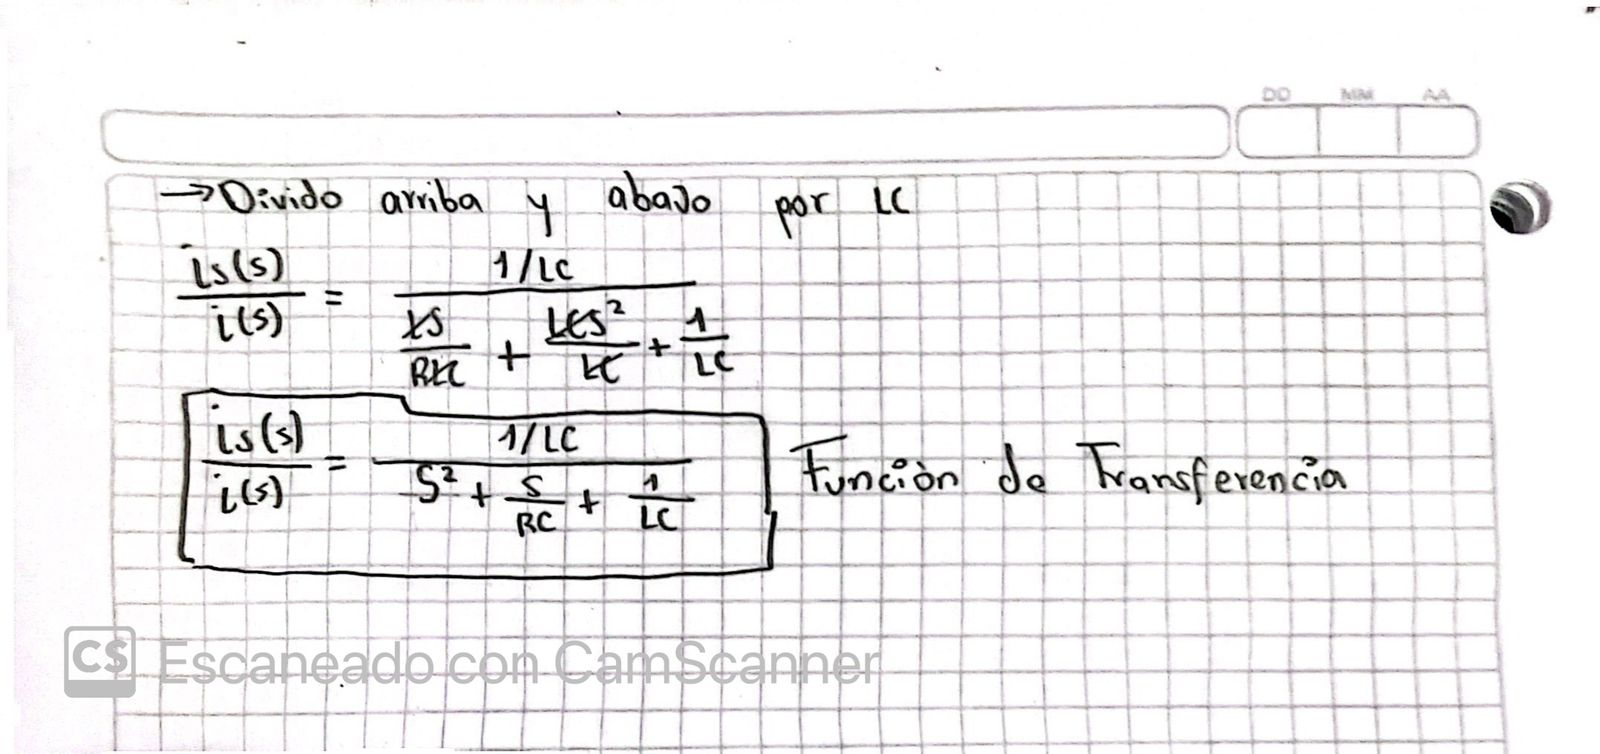

In [101]:
import sympy as sym
import matplotlib.pyplot as plt
import sympy.physics.control as control

sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C, w = sym.symbols('t R L C omega', positive=True)
#Entrada de interés en Laplace
X = w / (s**2 + w**2) # Ajustar según tipo de entrada
H=control.TransferFunction(1,(s**2 + s/(R*C) + 1/(L*C))*L*C,s) #Funcion de transferencia con la API de control
#Hlc = H/(1+H) #para lazo cerrado

Y = H.num * X /H.den#función de transferencia del circuito multiplicada por X(s)
#Función de salida
Y

              ω               
──────────────────────────────
    ⎛ 2    2⎞ ⎛ 2    s     1 ⎞
C⋅L⋅⎝ω  + s ⎠⋅⎜s  + ─── + ───⎟
              ⎝     C⋅R   C⋅L⎠

In [102]:
#Modelo en el tiempo en función de RLC
Ye = Y
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

           -t      ⎛     ____________⎞           
          ─────    ⎜    ╱      2     ⎟           
          2⋅C⋅R    ⎜t⋅╲╱  4⋅C⋅R  - L ⎟           
2⋅C⋅√L⋅R⋅ℯ     ⋅sin⎜─────────────────⎟           
                   ⎝     2⋅C⋅√L⋅R    ⎠   sin(ω⋅t)
────────────────────────────────────── + ────────
              ____________                  ω    
             ╱      2                            
           ╲╱  4⋅C⋅R  - L                        

In [103]:
#Modelo en el tiempo con RLC evaluados
RLC = {R: 1, L: sym.Rational('.5'), C: sym.Rational('.4')}#valores utilizados para la simulación
Ye = Y.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)

yt

       -5⋅t                       
       ─────                      
         4      ⎛√55⋅t⎞           
4⋅√55⋅ℯ     ⋅sin⎜─────⎟           
                ⎝  4  ⎠   sin(ω⋅t)
─────────────────────── + ────────
           55                ω    

In [104]:
#Función de salida Y(s) -- Laplace
Ye

          5⋅ω           
────────────────────────
⎛ 2    2⎞ ⎛ 2   5⋅s    ⎞
⎝ω  + s ⎠⋅⎜s  + ─── + 5⎟
          ⎝      2     ⎠

In [105]:
#Función de salida y(t) -- en tiempo
yt

       -5⋅t                       
       ─────                      
         4      ⎛√55⋅t⎞           
4⋅√55⋅ℯ     ⋅sin⎜─────⎟           
                ⎝  4  ⎠   sin(ω⋅t)
─────────────────────── + ────────
           55                ω    

#1. Diagrama de polos y ceros.

In [112]:
poles = sym.roots(sym.denom(Ye), s) #se obtienen la raices del denominador
poles

⎧                   5   √55⋅ⅈ       5   √55⋅ⅈ   ⎫
⎨-ⅈ⋅ω: 1, ⅈ⋅ω: 1, - ─ - ─────: 1, - ─ + ─────: 1⎬
⎩                   4     4         4     4     ⎭

In [114]:
zeros = sym.roots(sym.numer(Ye), s) #raíces del numerador
zeros

{}

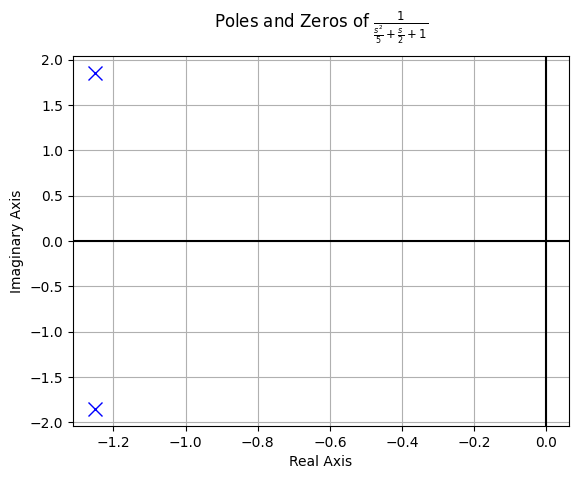

In [106]:
HRLC=control.TransferFunction(H.num,H.den.subs(RLC),s)
control.pole_zero_plot(HRLC)

#3. Diagrama de bode.



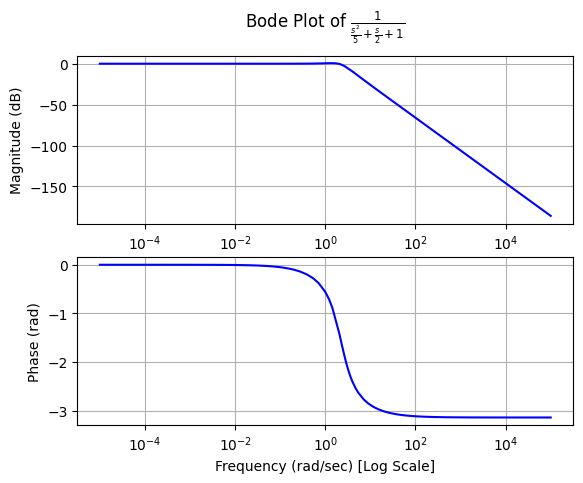

In [107]:
control.bode_plot(HRLC)

4. Respuesta impulso.


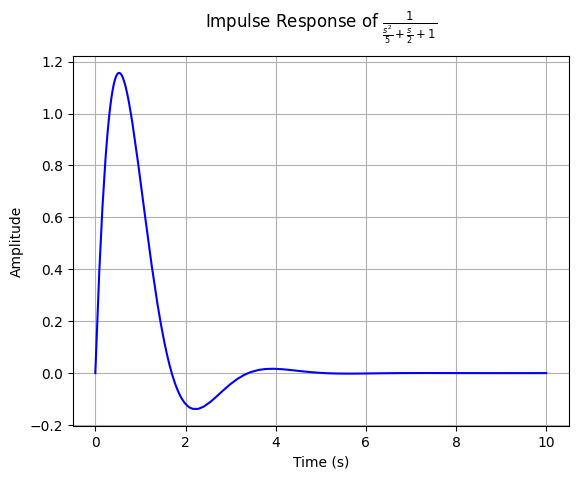

In [108]:
control.impulse_response_plot(HRLC)

5. Respuesta escalón.  


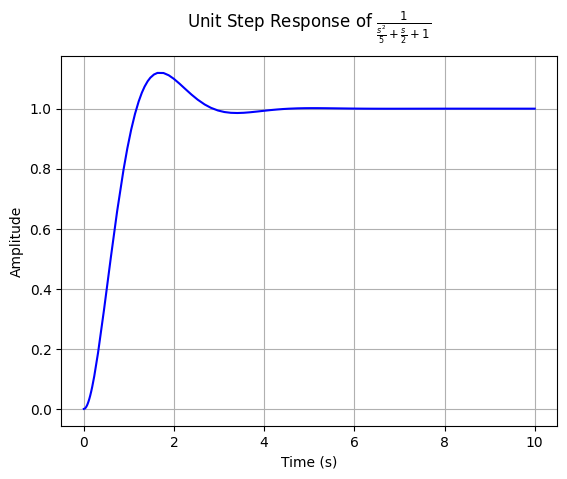

In [109]:
control.step_response_plot(HRLC)

6. Respuesta rampa.

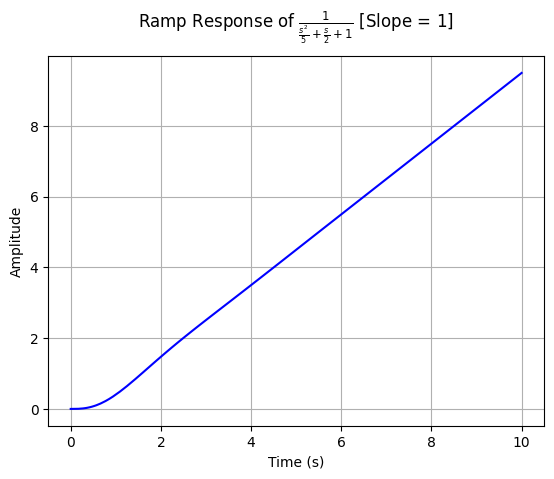

In [110]:
control.ramp_response_plot(HRLC)